# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Gonna need the URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loop to create dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | zhezkazgan
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hobyo
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | along
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | lewiston
Processing Record 16 of Set 1 | blackwater
Processing Record 17 of Set 1 | koumac
Processing Record 18 of Set 1 | ormond beach
Processing Record 19 of Set 1 | sao joao da barra
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | srednekolymsk
Processing Record 23 of Set 1 | beringovskiy
Processing Record 24 of Set 1 | kahului
Processing Record 25

Processing Record 36 of Set 4 | araouane
Processing Record 37 of Set 4 | yulara
Processing Record 38 of Set 4 | ballina
Processing Record 39 of Set 4 | vestmannaeyjar
City not found. Skipping...
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | likasi
Processing Record 42 of Set 4 | mamallapuram
City not found. Skipping...
Processing Record 43 of Set 4 | morehead
Processing Record 44 of Set 4 | mys shmidta
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | konosha
Processing Record 47 of Set 4 | leninsk
Processing Record 48 of Set 4 | balakirevo
Processing Record 49 of Set 4 | biri
Processing Record 1 of Set 5 | lompoc
City not found. Skipping...
Processing Record 2 of Set 5 | new norfolk
City not found. Skipping...
Processing Record 3 of Set 5 | beloha
Processing Record 4 of Set 5 | half moon bay
Processing Record 5 of Set 5 | polunochnoye
Processing Record 6 of Set 5 | kumano
Processing Record 7 of Set 5 | lasa
Processing Record 8 of

Processing Record 30 of Set 8 | salina cruz
Processing Record 31 of Set 8 | san jeronimo
Processing Record 32 of Set 8 | margate
Processing Record 33 of Set 8 | bereslavka
Processing Record 34 of Set 8 | hithadhoo
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 35 of Set 8 | kargil
Processing Record 36 of Set 8 | havoysund
Processing Record 37 of Set 8 | bonavista
Processing Record 38 of Set 8 | nizhniy kuranakh
Processing Record 39 of Set 8 | skibbereen
Processing Record 40 of Set 8 | mackay
Processing Record 41 of Set 8 | immokalee
Processing Record 42 of Set 8 | blois
Processing Record 43 of Set 8 | acapulco
Processing Record 44 of Set 8 | nahrin
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | cuamba
Processing Record 47 of Set 8 | kruisfontein
Processing Record 48 of Set 8 | beisfjord
Processing Record 49 of Set 8 | nouadhibou
City not found. Skipping...
Processing Record 1 of Set 9 | katsuura
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuatapere,100,NZ,1609810053,92,-46.13,167.68,59.00,1.01
1,chokurdakh,14,RU,1609810053,85,70.63,147.92,-28.17,10.63
2,zhezkazgan,98,KZ,1609810053,87,47.80,67.71,-2.43,8.28
3,kapaa,1,US,1609810053,69,22.08,-159.32,78.80,9.17
4,lebu,0,CL,1609809932,76,-37.62,-73.65,56.26,22.24


In [23]:
#checkout if any cities have a humidity of over 100
humid = []
for i in weather_df["Humidity"]:
    if i > 100:
        humid.append(weather_df["City"][i])
print(humid)

[]


In [24]:
#so how many cities did we go through?
weather_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [41]:
hum_mean = round(weather_df["Humidity"].astype('float').mean(), 2)



76.69


In [69]:
#if there's one thing i really like doing with variable names, it's simplifying them. A lot
w_count = weather_df.count()
w_mean = weather_df.mean()
w_std = weather_df.std()
w_min = weather_df.min()
quartiles = weather_df.quantile([.25,.5,.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[.75]
iqr = upperq-lowerq
w_max = weather_df.max()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

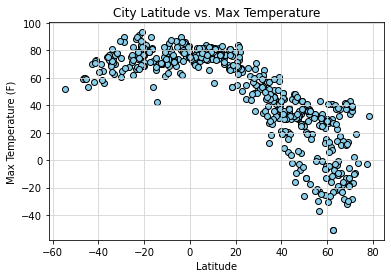

In [37]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/LatvTemp.png")
plt.show()

## Latitude vs. Humidity Plot

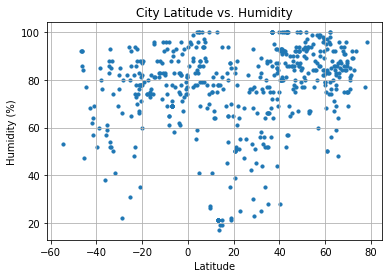

In [38]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Figures/HumvLat.png")
plt.show()

## Latitude vs. Cloudiness Plot

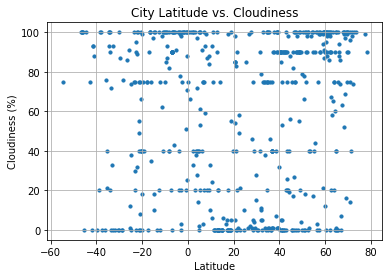

In [40]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Figures/LatvCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

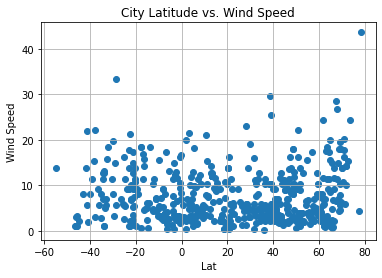

In [73]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("Figures/LatvWind.png")
plt.show()

## Linear Regression

NameError: name 'DataFrame' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


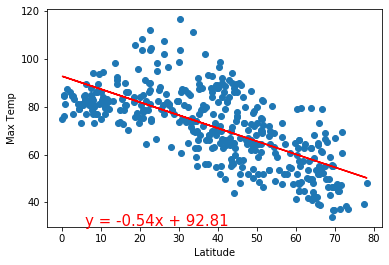

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


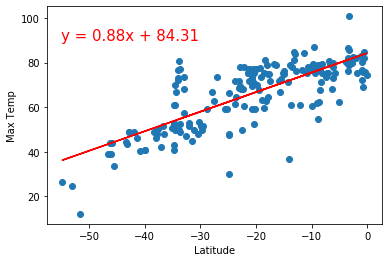

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


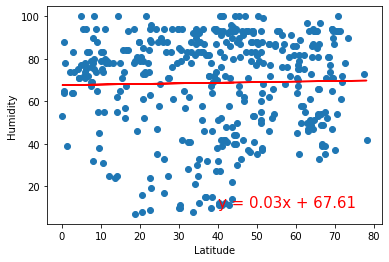

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


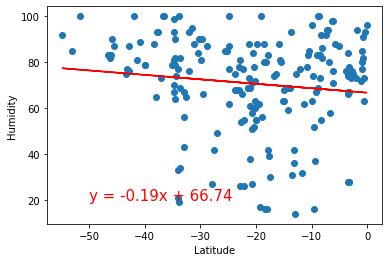

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


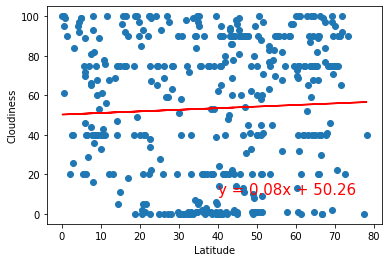

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


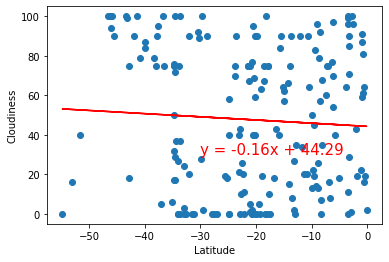

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


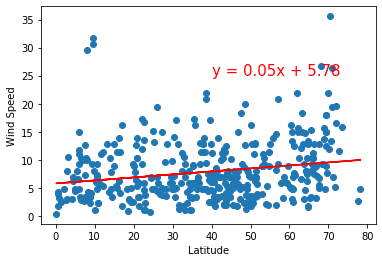

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


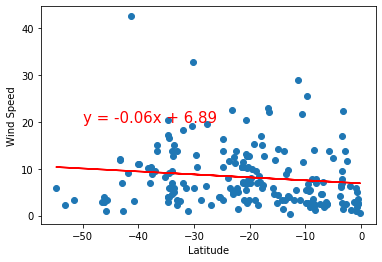